In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('jumia_scraping.csv')
df.head(20)

,Product ID,Name,Category,Price (Dh),Old Price (Dh),Discount_old_price (%),Discount (%),Marque,Rating
0,1531,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,154400,40000,NaN,69,"TV, Vidéo & Home CinémaAccessoires Hi-TechAudi...",3.6
1,1687,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,104900,18000,NaN,30,"Samsung 32"" Smart Tv HD - Récepteur Intégré - ...",5.0
2,3179,UNIVERSAL 1080P Mini HDMI to RCA Audio Video A...,TV & Hi,213000,17000,NaN,48,"Visio 32"" TV HD LED - Récepteur intégré + TNT ...",3.8
3,1253,Cable d'alimentation secteur 220V pour PC impr...,TV & Hi,116600,4500,NaN,37,"BUY SAT TV 43"" Smart Android Original 11 - FU...",4.4
4,2775,Sony Câble HDMI 3m - Neuf,TV & Hi,60000,7100,NaN,17,NaN,4.2
5,1577,Cable HDMI 1.5M 3D Haute Defenition Noir,TV & Hi,28000,4900,NaN,42,Seulement Boutiques Officielles.,4.1
6,3764,Nia Casque Wireless Bluetooth Android - Apple ...,TV & Hi,29000,29900,3.0,70,NaN,3.8
7,2178,C120 Mouse Wireless Android Remote Controller...,TV & Hi,37900,9900,NaN,44,AiiilApcBoyaEasy CapGeneralGenericHocoHyundaii...,5.0
8,3067,"Microphone à condensateur USB professionnel, e...",TV & Hi,249900,94900,NaN,76,Articles en promotion seulement,5.0
9,1109,Wicom Univers Originale Microphone Cravate 3.5...,TV & Hi,29900,19900,NaN,73,Black NightBlue SkyOrange,4.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product ID              428 non-null    int64  
 1   Name                    428 non-null    object 
 2   Category                428 non-null    object 
 3   Price (Dh)              428 non-null    int64  
 4   Old Price (Dh)          428 non-null    int64  
 5   Discount_old_price (%)  332 non-null    float64
 6   Discount (%)            428 non-null    int64  
 7   Marque                  365 non-null    object 
 8   Rating                  428 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 30.2+ KB


In [3]:
df.describe()

,Product ID,Price (Dh),Old Price (Dh),Discount_old_price (%),Discount (%),Rating
count,428.000000,4.280000e+02,4.280000e+02,332.000000,428.000000,428.000000
mean,2957.679907,8.027110e+04,5.510180e+06,42.915663,37.934579,3.835280
std,2020.208094,1.209061e+06,8.762802e+07,23.331425,19.198224,1.137643
min,1001.000000,9.000000e+02,2.000000e+03,0.000000,2.000000,1.000000
25%,1594.000000,4.900000e+03,9.000000e+03,24.000000,21.000000,3.300000
50%,2369.000000,8.905000e+03,1.200000e+04,40.000000,35.000000,4.000000
75%,3195.000000,1.960000e+04,2.037500e+04,62.000000,53.250000,5.000000
max,9845.000000,2.500750e+07,1.690018e+09,100.000000,83.000000,5.000000


In [4]:
numeric=df.select_dtypes(include=["float64", "int64"]).columns
categoriel=df.select_dtypes(include=["object"]).columns
print(" Numeric =",len(numeric))
print(" Categorielle =",len(categoriel))

 Numeric = 6
 Categorielle = 3


Text(0.5, 1.0, 'Horizental Bar')

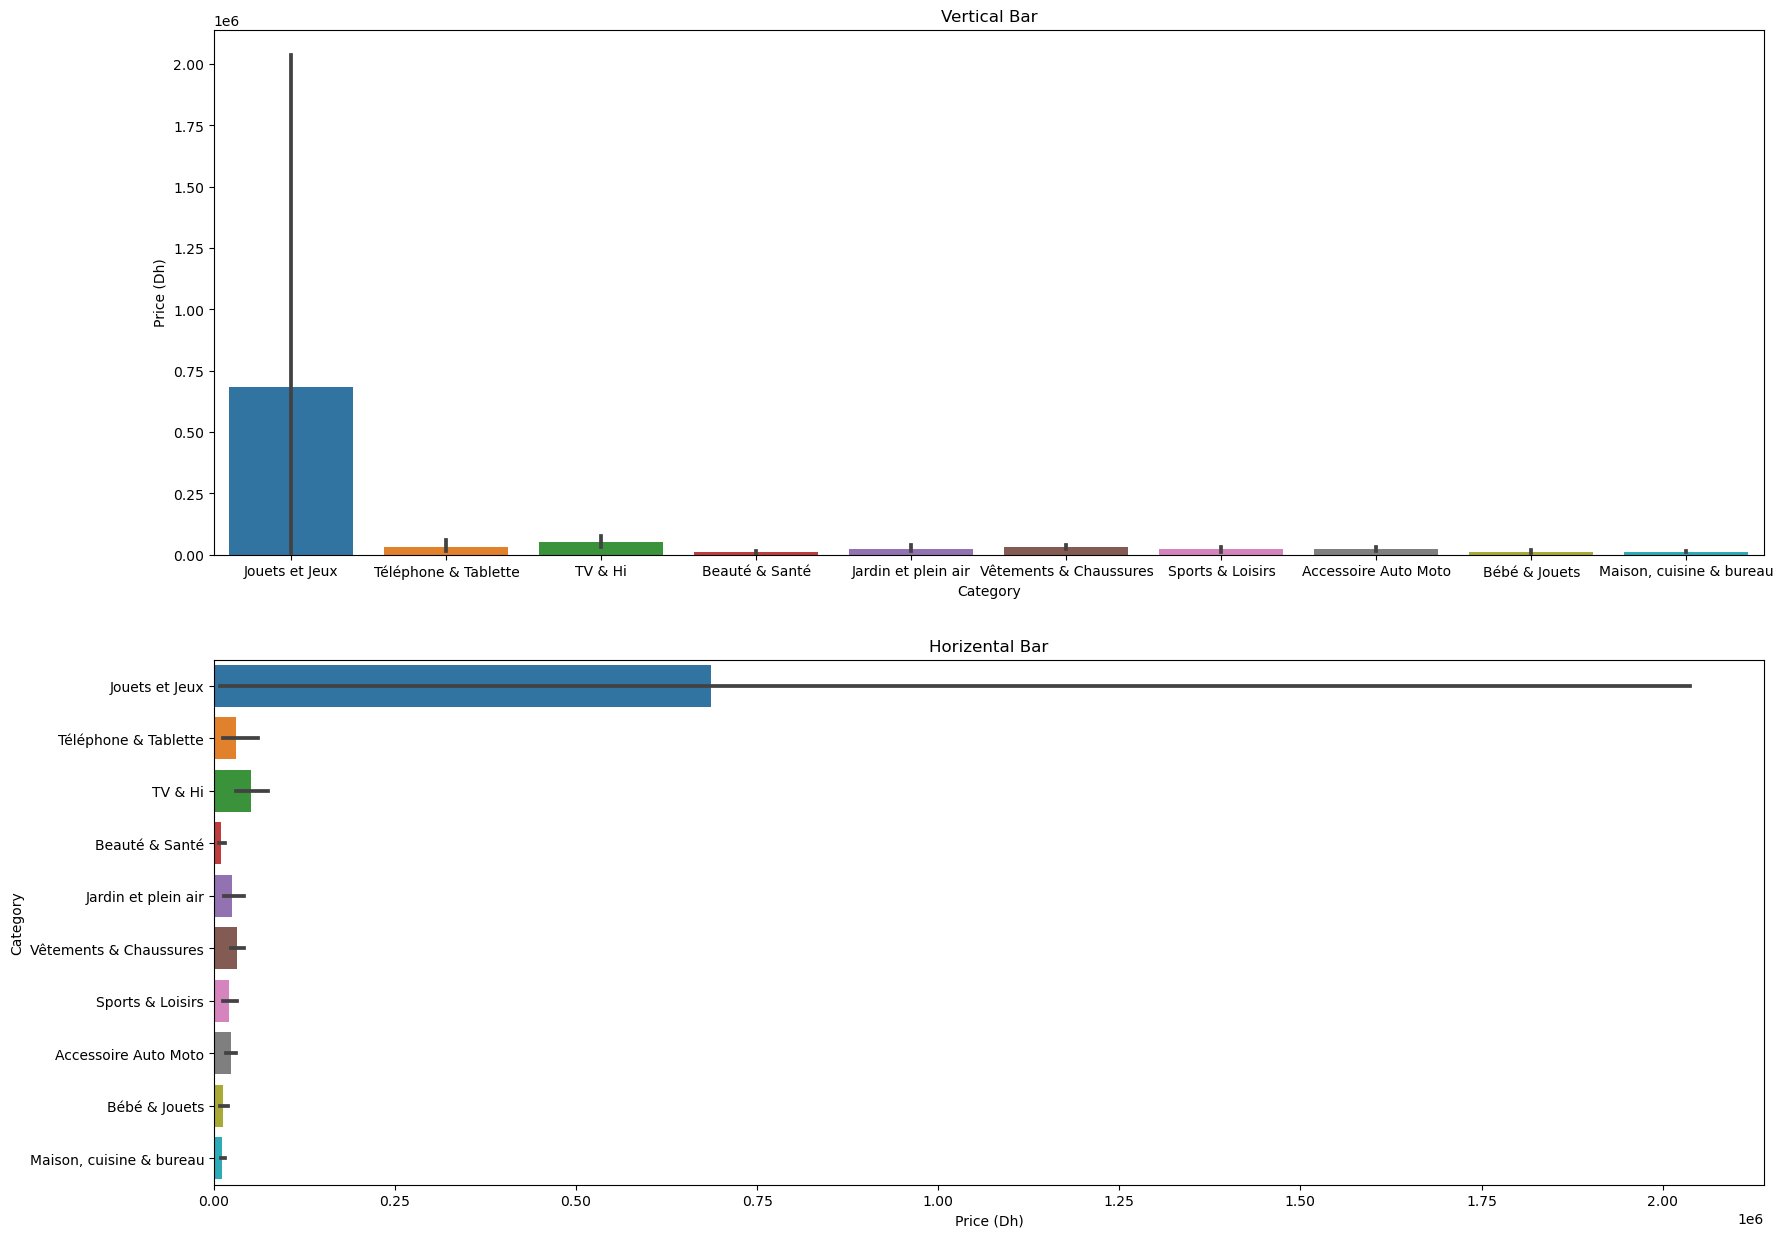

In [5]:
# Supposons que 'df' est votre DataFrame avec une colonne 'Price (Dh)'
top = df.sort_values(by='Price (Dh)', ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(x='Category', y='Price (Dh)', data=top, orient='v',ax=ax[0])
ax[0].set_title('Vertical Bar')
sns.barplot(x='Price (Dh)', y='Category', data=top, orient='h',ax=ax[1])
ax[1].set_title('Horizental Bar')


In [6]:
# Calcul de la moyenne des prix par catégorie
moyenne_par_categorie = df.groupby('Category')['Price (Dh)'].mean()

# Afficher la moyenne des prix par catégorie
print(moyenne_par_categorie)

Category
Accessoire Auto Moto         23210.534884
Beauté & Santé                9543.329114
Bébé & Jouets                13072.961538
Jardin et plein air          24723.470588
Jouets et Jeux              685678.000000
Maison, cuisine & bureau     11741.901961
Sports & Loisirs             21428.200000
TV & Hi                      51551.787879
Téléphone & Tablette         29949.537500
Vêtements & Chaussures       32123.809524
Name: Price (Dh), dtype: float64


In [46]:
# Filtrer le DataFrame pour inclure uniquement les lignes où 'Category' est égal à "Jouet et Jeux"
tv_hi_data = df[df['Category'] == "Jouets et Jeux"]

# Afficher les données filtrées
print(tv_hi_data)


     Product ID                                               Name  \
150        3027  Fléchettes pour pistolets - bleu 100 pcs -  re...   
151        3289  Pokemon 55 PCS GX Rare Golden Cards V Series C...   
152        1061    Jeu de créative MOSAIC - jouet éducatif 296 PCS   
153        1315  Pokemon 55 PCS GX Rare Golden Cards V Series C...   
154        1066  pack de 3 pcs Porte crayon et stylo pour enfan...   
155        3848  22 pcs BALLONS COEUR ♥️  POUR MARIAGE ANNIVERS...   
156        2289  Pack 7 × Puzzle 30 pcs Papier cartonné - dinos...   
157        1254  pack de 3 pcs Porte crayon et stylo pour enfan...   
158        2028  Trefl Puzzle Mosquée Hassan 2 - 1000 Pcs - TRE...   
159        3040  Slime Pour enfants Multicolore 3 Pcs x 150gm A...   
160        1394  Uno UNO jeu de cartes poker Famille Amusement ...   
161        1359  3 pcs Bougies d'anniversaire magique multicolo...   
162        1545  Jeu de créative MOSAIC - jouet éducatif 296 PC...   
163        3300  15 

In [7]:
# Filtrer les lignes où 'Category' est égal à "Bébé & Jouets"
filtered_df = df[df['Category'] == "TV & Hi"]

# Appliquer value_counts() à la colonne 'Produit' du DataFrame filtré
occurrences = filtered_df['Category'].value_counts()

print(occurrences)

Category
TV & Hi    33
Name: count, dtype: int64


# Quelle est la répartition des produits par catégorie ?

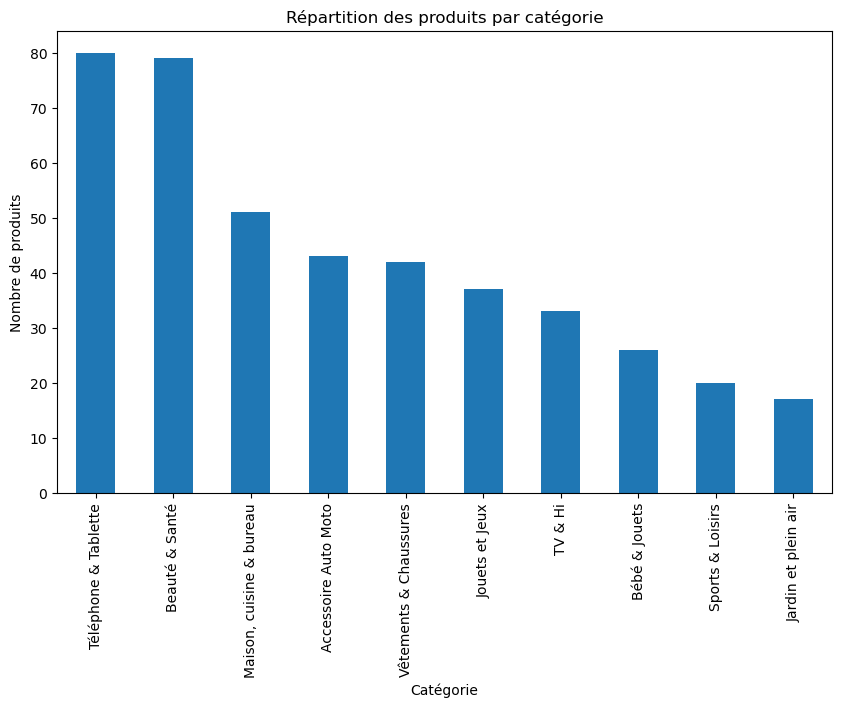

In [8]:
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Répartition des produits par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produits')
plt.show()

# Quelle est la distribution des évaluations des produits?

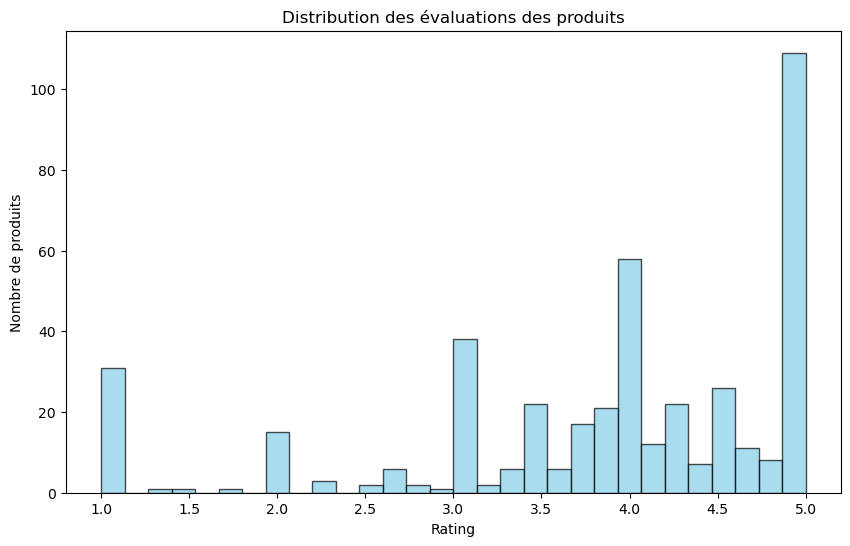

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution des évaluations des produits')
plt.xlabel('Rating')
plt.ylabel('Nombre de produits')
plt.show()

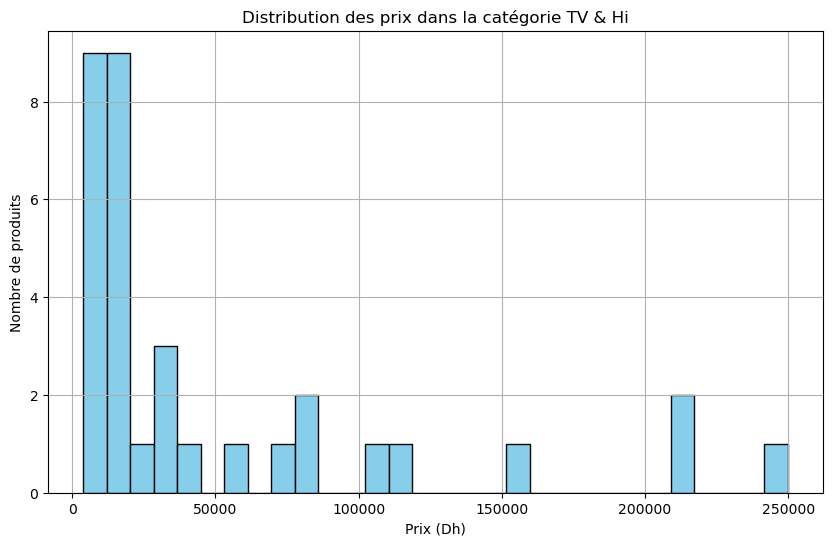

In [10]:
plt.figure(figsize=(10, 6))
df[df['Category'] == 'TV & Hi']['Price (Dh)'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des prix dans la catégorie TV & Hi')
plt.xlabel('Prix (Dh)')
plt.ylabel('Nombre de produits')
plt.show()

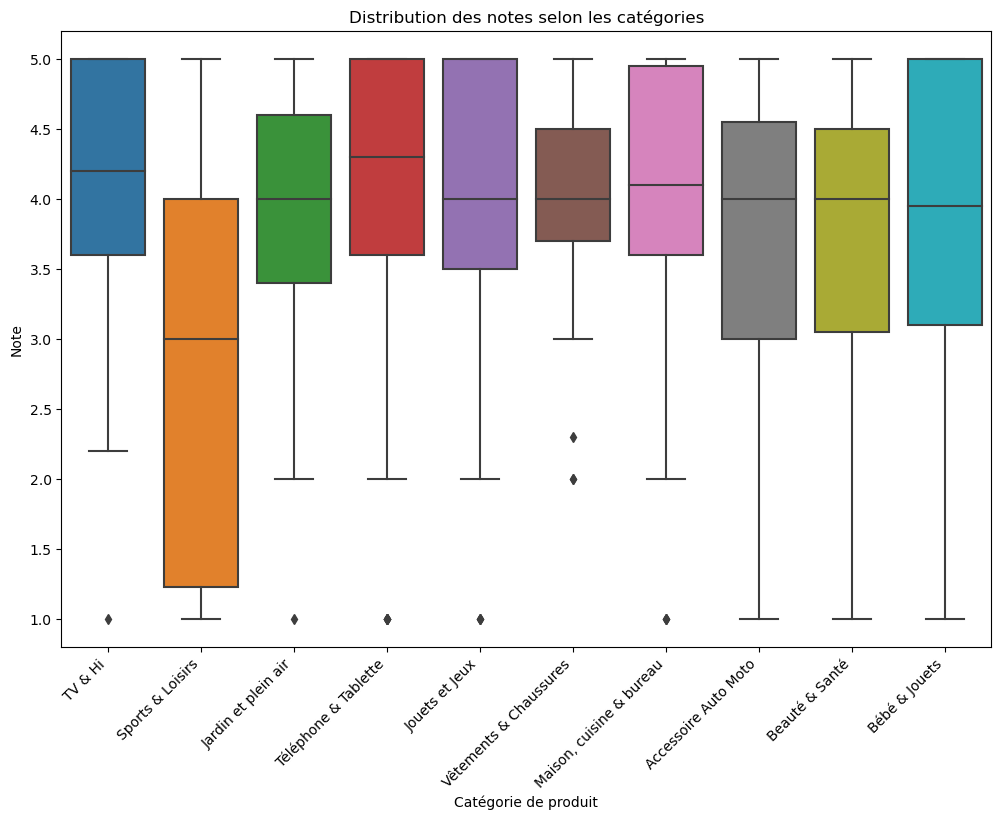

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Distribution des notes selon les catégories')
plt.xlabel('Catégorie de produit')
plt.ylabel('Note')
plt.xticks(rotation=45, ha='right')
plt.show()

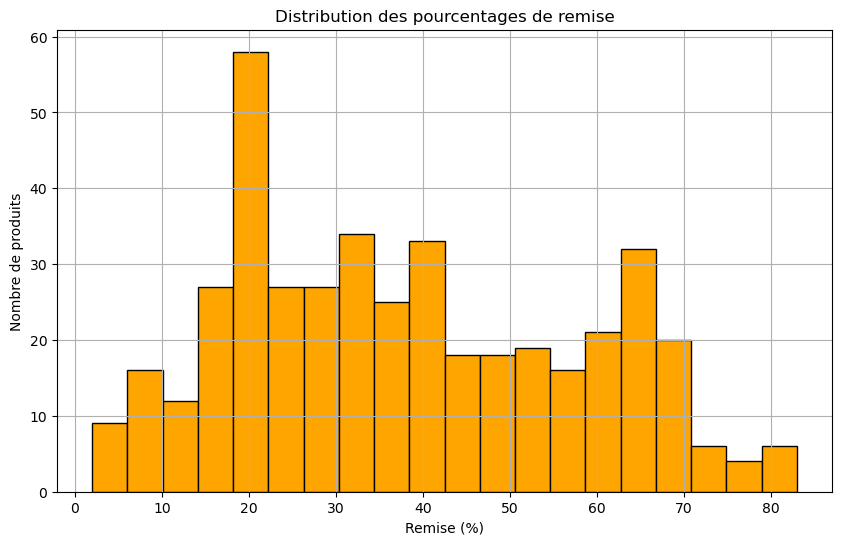

In [12]:
plt.figure(figsize=(10, 6))
df['Discount (%)'].hist(bins=20, color='orange', edgecolor='black')
plt.title('Distribution des pourcentages de remise')
plt.xlabel('Remise (%)')
plt.ylabel('Nombre de produits')
plt.show()

# Comment remettre la virgule qui a été perdu dans le scrapping?

In [13]:
df2=df.copy()
df2['Price (Dh)'] = (df2['Price (Dh)'] / 100)
df2['Old Price (Dh)'] = (df2['Old Price (Dh)'] / 100)
# Changer les données de la colonne
df2

,Product ID,Name,Category,Price (Dh),Old Price (Dh),Discount_old_price (%),Discount (%),Marque,Rating
0,1531,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1544.0,400.0,NaN,69,"TV, Vidéo & Home CinémaAccessoires Hi-TechAudi...",3.6
1,1687,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1049.0,180.0,NaN,30,"Samsung 32"" Smart Tv HD - Récepteur Intégré - ...",5.0
2,3179,UNIVERSAL 1080P Mini HDMI to RCA Audio Video A...,TV & Hi,2130.0,170.0,NaN,48,"Visio 32"" TV HD LED - Récepteur intégré + TNT ...",3.8
3,1253,Cable d'alimentation secteur 220V pour PC impr...,TV & Hi,1166.0,45.0,NaN,37,"BUY SAT TV 43"" Smart Android Original 11 - FU...",4.4
4,2775,Sony Câble HDMI 3m - Neuf,TV & Hi,600.0,71.0,NaN,17,NaN,4.2
...,...,...,...,...,...,...,...,...,...
423,1901,Animal Paradise - jeux de blocks en bois 68 pcs,Bébé & Jouets,299.0,349.0,14.0,14,NaN,3.9
424,1615,JOUETS JENGA 54 PCS,Bébé & Jouets,119.0,300.0,60.0,60,Ace BabyAmigAs Seen On TvBabyBaby CareChiccoDo...,4.5
425,1249,Baby Kit de Toilettage Portables Clou de Sécur...,Bébé & Jouets,99.0,85.0,NaN,31,Articles en promotion seulement,5.0
426,2106,"Ensemble de toilettage pour bébé, 6 pcs pour l...",Bébé & Jouets,59.0,80.0,26.0,26,BeigeOff-WhiteOrangeWood,5.0


In [14]:
# Filtrer le DataFrame pour inclure uniquement les lignes où 'Category' est égal à "TV & Hi"
tv_hi_data = df2[df2['Category'] == "Jouets et Jeux"]

# Afficher les données filtrées
print(tv_hi_data)

     Product ID                                               Name  \
150        3027  Fléchettes pour pistolets - bleu 100 pcs -  re...   
151        3289  Pokemon 55 PCS GX Rare Golden Cards V Series C...   
152        1061    Jeu de créative MOSAIC - jouet éducatif 296 PCS   
153        1315  Pokemon 55 PCS GX Rare Golden Cards V Series C...   
154        1066  pack de 3 pcs Porte crayon et stylo pour enfan...   
155        3848  22 pcs BALLONS COEUR ♥️  POUR MARIAGE ANNIVERS...   
156        2289  Pack 7 × Puzzle 30 pcs Papier cartonné - dinos...   
157        1254  pack de 3 pcs Porte crayon et stylo pour enfan...   
158        2028  Trefl Puzzle Mosquée Hassan 2 - 1000 Pcs - TRE...   
159        3040  Slime Pour enfants Multicolore 3 Pcs x 150gm A...   
160        1394  Uno UNO jeu de cartes poker Famille Amusement ...   
161        1359  3 pcs Bougies d'anniversaire magique multicolo...   
162        1545  Jeu de créative MOSAIC - jouet éducatif 296 PC...   
163        3300  15 

In [52]:
df.isna().sum()

Product ID                 0
Name                       0
Category                   0
Price (Dh)                 0
Old Price (Dh)             0
Discount_old_price (%)    96
Discount (%)               0
Marque                    63
Rating                     0
dtype: int64

# Comment remplacer les valeurs manquantes dans la colonne 'Discount_old_price (%)' par 0 ?

In [15]:
df2['Discount_old_price (%)'].fillna(0, inplace=True)
df2.head(20)

,Product ID,Name,Category,Price (Dh),Old Price (Dh),Discount_old_price (%),Discount (%),Marque,Rating
0,1531,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1544.00,400.0,0.0,69,"TV, Vidéo & Home CinémaAccessoires Hi-TechAudi...",3.6
1,1687,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1049.00,180.0,0.0,30,"Samsung 32"" Smart Tv HD - Récepteur Intégré - ...",5.0
2,3179,UNIVERSAL 1080P Mini HDMI to RCA Audio Video A...,TV & Hi,2130.00,170.0,0.0,48,"Visio 32"" TV HD LED - Récepteur intégré + TNT ...",3.8
3,1253,Cable d'alimentation secteur 220V pour PC impr...,TV & Hi,1166.00,45.0,0.0,37,"BUY SAT TV 43"" Smart Android Original 11 - FU...",4.4
4,2775,Sony Câble HDMI 3m - Neuf,TV & Hi,600.00,71.0,0.0,17,NaN,4.2
5,1577,Cable HDMI 1.5M 3D Haute Defenition Noir,TV & Hi,280.00,49.0,0.0,42,Seulement Boutiques Officielles.,4.1
6,3764,Nia Casque Wireless Bluetooth Android - Apple ...,TV & Hi,290.00,299.0,3.0,70,NaN,3.8
7,2178,C120 Mouse Wireless Android Remote Controller...,TV & Hi,379.00,99.0,0.0,44,AiiilApcBoyaEasy CapGeneralGenericHocoHyundaii...,5.0
8,3067,"Microphone à condensateur USB professionnel, e...",TV & Hi,2499.00,949.0,0.0,76,Articles en promotion seulement,5.0
9,1109,Wicom Univers Originale Microphone Cravate 3.5...,TV & Hi,299.00,199.0,0.0,73,Black NightBlue SkyOrange,4.5


# Quelle approche adopter pour remplacer les valeurs manquantes dans la colonne 'Marque' par 'Inconnu' ?

In [16]:
df2['Marque'].fillna('Inconnu', inplace=True)
df2

,Product ID,Name,Category,Price (Dh),Old Price (Dh),Discount_old_price (%),Discount (%),Marque,Rating
0,1531,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1544.0,400.0,0.0,69,"TV, Vidéo & Home CinémaAccessoires Hi-TechAudi...",3.6
1,1687,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1049.0,180.0,0.0,30,"Samsung 32"" Smart Tv HD - Récepteur Intégré - ...",5.0
2,3179,UNIVERSAL 1080P Mini HDMI to RCA Audio Video A...,TV & Hi,2130.0,170.0,0.0,48,"Visio 32"" TV HD LED - Récepteur intégré + TNT ...",3.8
3,1253,Cable d'alimentation secteur 220V pour PC impr...,TV & Hi,1166.0,45.0,0.0,37,"BUY SAT TV 43"" Smart Android Original 11 - FU...",4.4
4,2775,Sony Câble HDMI 3m - Neuf,TV & Hi,600.0,71.0,0.0,17,Inconnu,4.2
...,...,...,...,...,...,...,...,...,...
423,1901,Animal Paradise - jeux de blocks en bois 68 pcs,Bébé & Jouets,299.0,349.0,14.0,14,Inconnu,3.9
424,1615,JOUETS JENGA 54 PCS,Bébé & Jouets,119.0,300.0,60.0,60,Ace BabyAmigAs Seen On TvBabyBaby CareChiccoDo...,4.5
425,1249,Baby Kit de Toilettage Portables Clou de Sécur...,Bébé & Jouets,99.0,85.0,0.0,31,Articles en promotion seulement,5.0
426,2106,"Ensemble de toilettage pour bébé, 6 pcs pour l...",Bébé & Jouets,59.0,80.0,26.0,26,BeigeOff-WhiteOrangeWood,5.0


# Comment supprimer les doublons basés sur la colonne 'Product ID' tout en conservant la première occurrence ?

In [17]:
df2.drop_duplicates(subset='Product ID', keep='first', inplace=True)
df2

,Product ID,Name,Category,Price (Dh),Old Price (Dh),Discount_old_price (%),Discount (%),Marque,Rating
0,1531,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1544.0,400.0,0.0,69,"TV, Vidéo & Home CinémaAccessoires Hi-TechAudi...",3.6
1,1687,Nouveau mini Clavier et Souris Sans Fil Blueto...,TV & Hi,1049.0,180.0,0.0,30,"Samsung 32"" Smart Tv HD - Récepteur Intégré - ...",5.0
2,3179,UNIVERSAL 1080P Mini HDMI to RCA Audio Video A...,TV & Hi,2130.0,170.0,0.0,48,"Visio 32"" TV HD LED - Récepteur intégré + TNT ...",3.8
3,1253,Cable d'alimentation secteur 220V pour PC impr...,TV & Hi,1166.0,45.0,0.0,37,"BUY SAT TV 43"" Smart Android Original 11 - FU...",4.4
4,2775,Sony Câble HDMI 3m - Neuf,TV & Hi,600.0,71.0,0.0,17,Inconnu,4.2
...,...,...,...,...,...,...,...,...,...
421,2680,"lampes COB LED ,pack 3 pcs ,Night light ,sans ...",Bébé & Jouets,89.0,130.0,32.0,32,Articles en promotion seulement,4.3
424,1615,JOUETS JENGA 54 PCS,Bébé & Jouets,119.0,300.0,60.0,60,Ace BabyAmigAs Seen On TvBabyBaby CareChiccoDo...,4.5
425,1249,Baby Kit de Toilettage Portables Clou de Sécur...,Bébé & Jouets,99.0,85.0,0.0,31,Articles en promotion seulement,5.0
426,2106,"Ensemble de toilettage pour bébé, 6 pcs pour l...",Bébé & Jouets,59.0,80.0,26.0,26,BeigeOff-WhiteOrangeWood,5.0


In [51]:
df2.isna().sum()

Product ID                0
Name                      0
Category                  0
Price (Dh)                0
Old Price (Dh)            0
Discount_old_price (%)    0
Discount (%)              0
Marque                    0
Rating                    0
dtype: int64

In [18]:
df2= df2.drop(156)

In [19]:
# Filtrer le DataFrame pour inclure uniquement les lignes où 'Category' est égal à "Jouet et Jeux"
tv_hi_data = df2[df2['Category'] == "Jouets et Jeux"]

# Afficher les données filtrées
print(tv_hi_data)


     Product ID                                               Name  \
150        3027  Fléchettes pour pistolets - bleu 100 pcs -  re...   
151        3289  Pokemon 55 PCS GX Rare Golden Cards V Series C...   
152        1061    Jeu de créative MOSAIC - jouet éducatif 296 PCS   
153        1315  Pokemon 55 PCS GX Rare Golden Cards V Series C...   
154        1066  pack de 3 pcs Porte crayon et stylo pour enfan...   
155        3848  22 pcs BALLONS COEUR ♥️  POUR MARIAGE ANNIVERS...   
157        1254  pack de 3 pcs Porte crayon et stylo pour enfan...   
158        2028  Trefl Puzzle Mosquée Hassan 2 - 1000 Pcs - TRE...   
159        3040  Slime Pour enfants Multicolore 3 Pcs x 150gm A...   
160        1394  Uno UNO jeu de cartes poker Famille Amusement ...   
162        1545  Jeu de créative MOSAIC - jouet éducatif 296 PC...   
163        3300  15 pcs ballons dore 15 pcs ballons blanc anniv...   
164        3111       Trefl Puzzle Puzzle "Sunset Ride" - 1000 Pcs   
165        5279  5 p

Text(0.5, 1.0, 'Répartition des Prix par Catégorie (Barres Horizontales)')

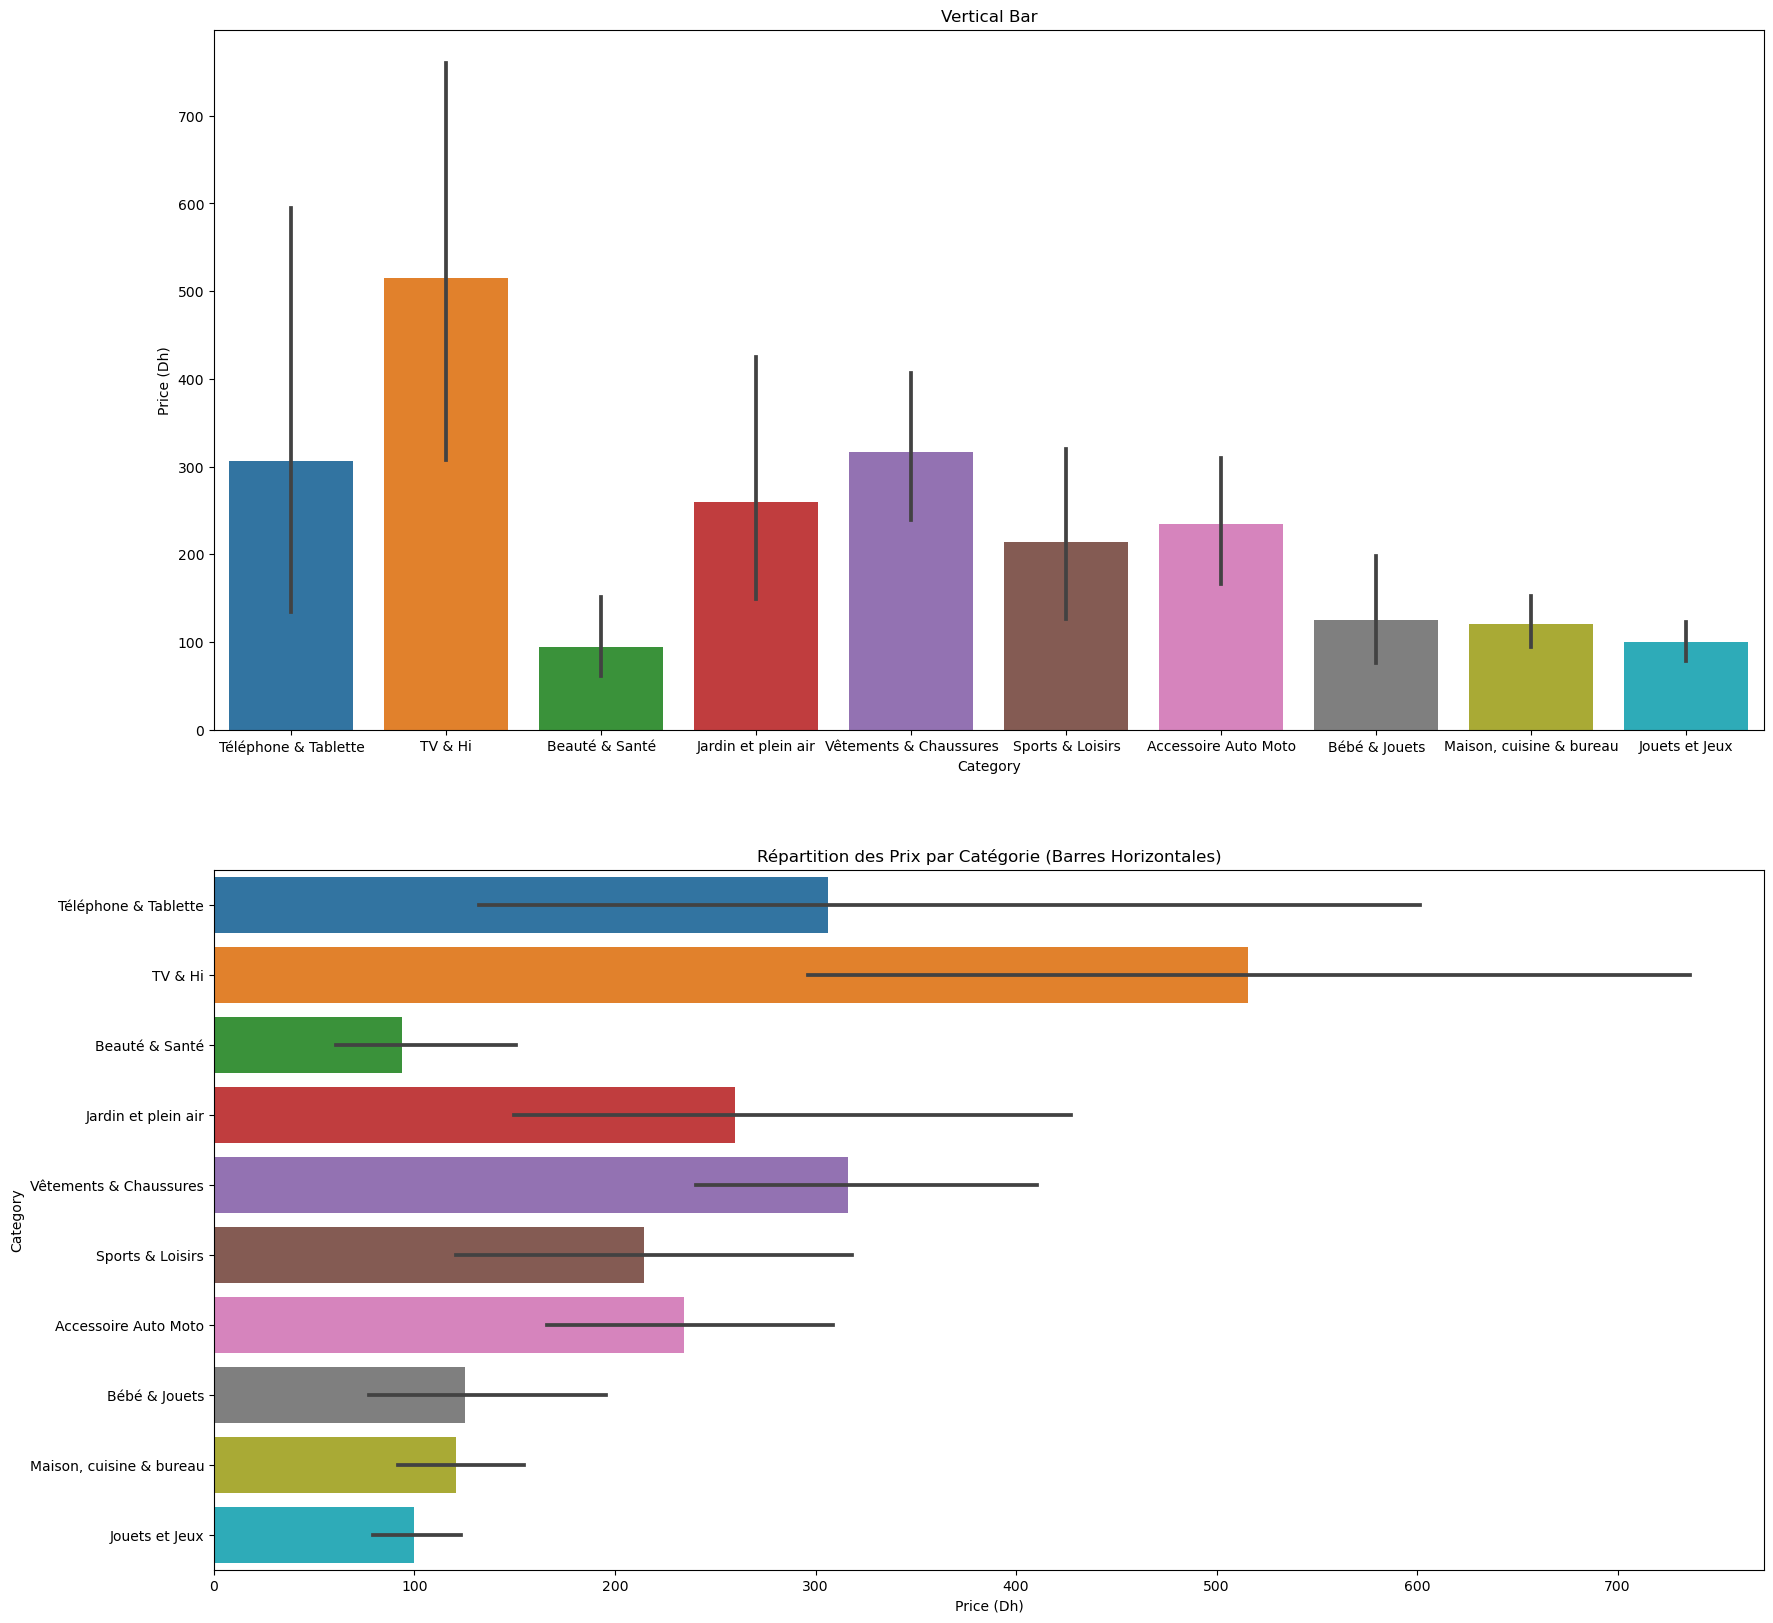

In [21]:
top = df2.sort_values(by='Price (Dh)', ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.barplot(x='Category', y='Price (Dh)', data=top, orient='v',ax=ax[0])
ax[0].set_title('Vertical Bar')
sns.barplot(x='Price (Dh)', y='Category', data=top, orient='h',ax=ax[1])
ax[1].set_title('Répartition des Prix par Catégorie (Barres Horizontales)')

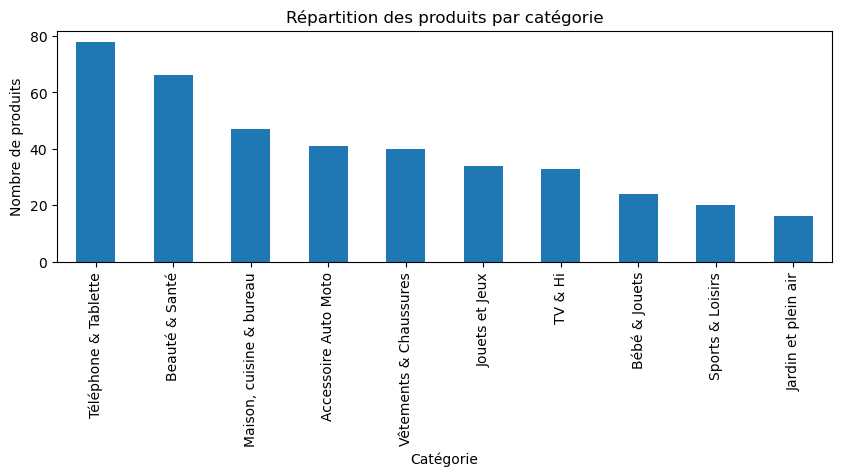

In [22]:
plt.figure(figsize=(10, 3))
df2['Category'].value_counts().plot(kind='bar')
plt.title('Répartition des produits par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produits')
plt.show()

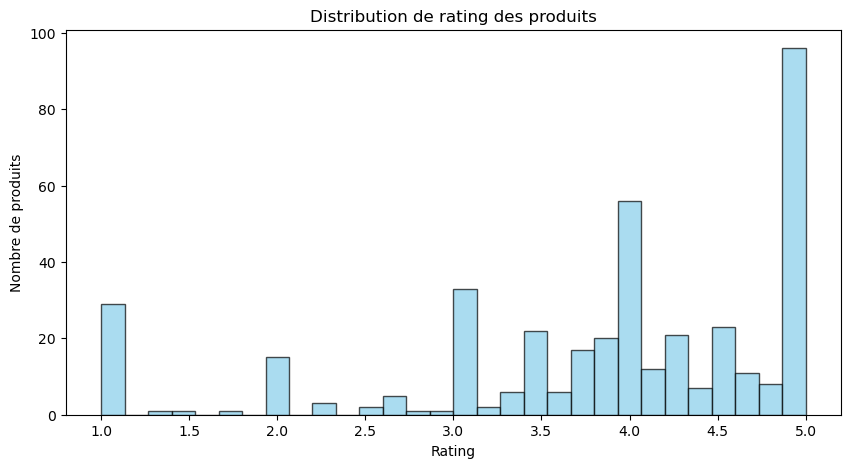

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(df2['Rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution de rating des produits')
plt.xlabel('Rating')
plt.ylabel('Nombre de produits')
plt.show()

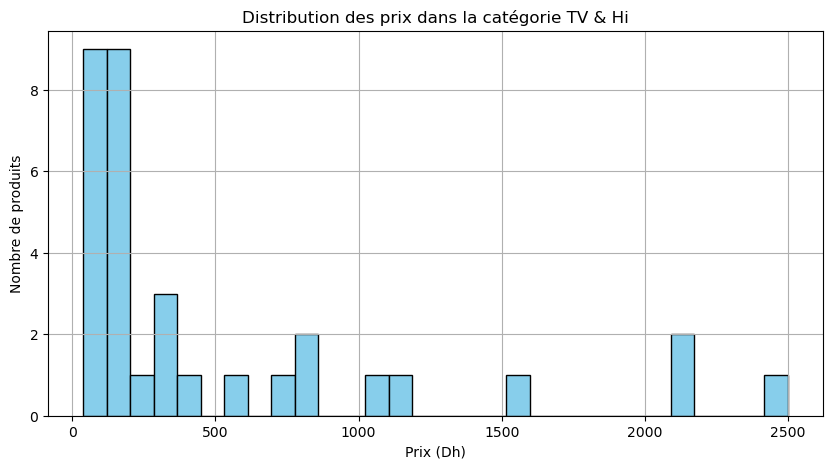

In [24]:
plt.figure(figsize=(10, 5))
df2[df2['Category'] == 'TV & Hi']['Price (Dh)'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des prix dans la catégorie TV & Hi')
plt.xlabel('Prix (Dh)')
plt.ylabel('Nombre de produits')
plt.show()

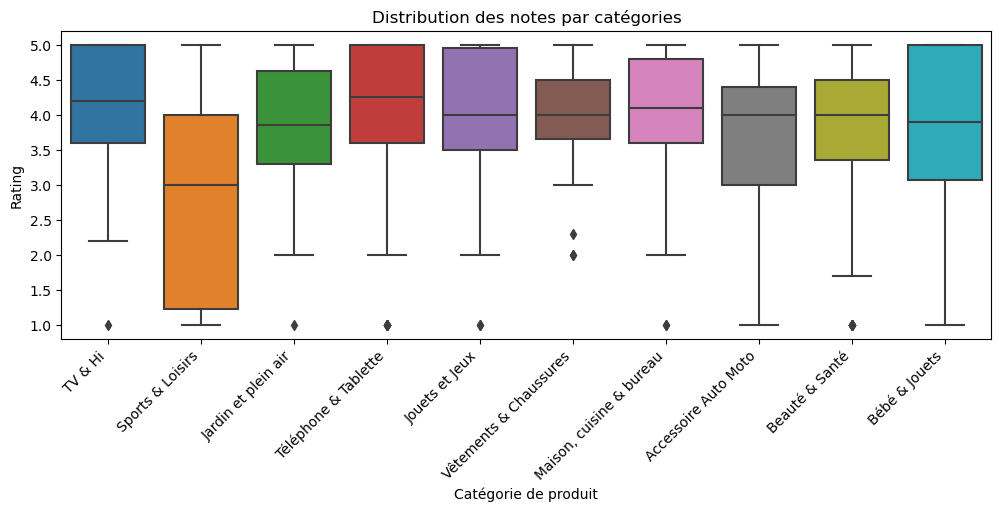

In [25]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Category', y='Rating', data=df2)
plt.title('Distribution des notes par catégories')
plt.xlabel('Catégorie de produit')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

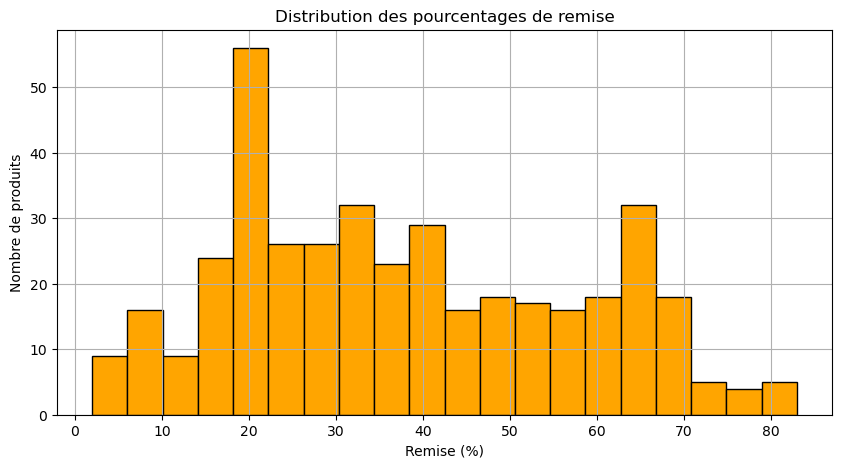

In [29]:
plt.figure(figsize=(10,5))
df2['Discount (%)'].hist(bins=20, color='orange', edgecolor='black')
plt.title('Distribution des pourcentages de remise')
plt.xlabel('Remise (%)')
plt.ylabel('Nombre de produits')
plt.show()

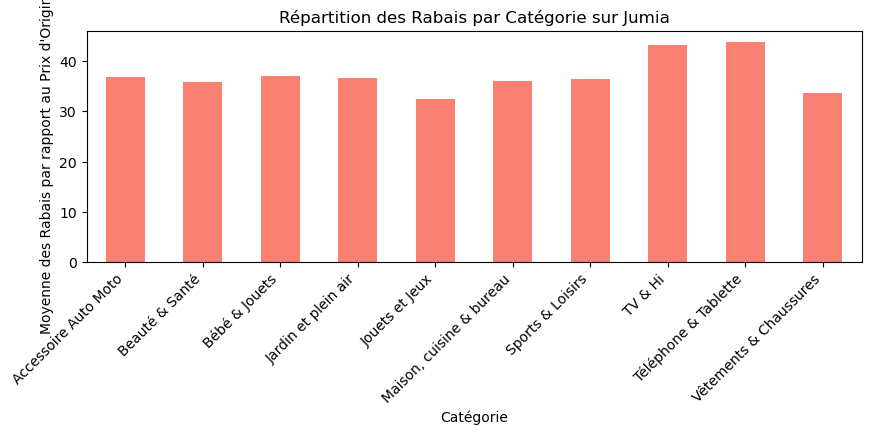

In [30]:
plt.figure(figsize=(10, 3))
average_discount_old_price = df2.groupby('Category')['Discount (%)'].mean()
average_discount_old_price.plot(kind='bar', color='salmon')
plt.title('Répartition des Rabais par Catégorie sur Jumia')
plt.xlabel('Catégorie')
plt.ylabel('Moyenne des Rabais par rapport au Prix d\'Origine (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 1.0, 'Répartition des Produits par Catégorie')

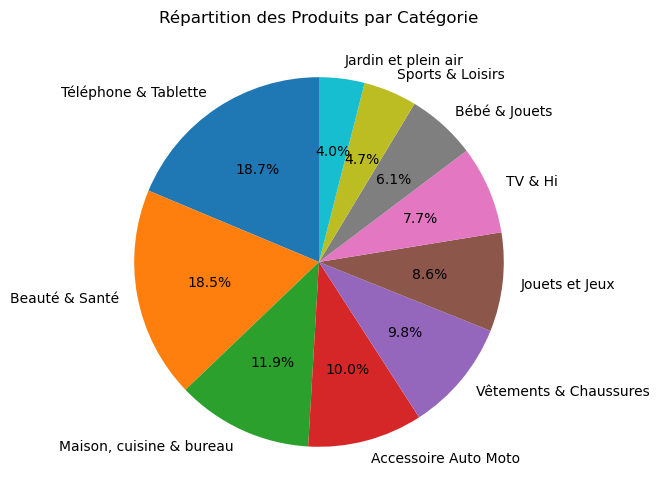

In [31]:
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame 'df' contenant vos données
plt.figure(figsize=(10,6))

# Répartition des produits par catégorie
categories_count = df['Category'].value_counts()
plt.pie(categories_count, labels=categories_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des Produits par Catégorie')


In [32]:
df3=df2.copy()
df3=df3.drop(categoriel,axis=1)
df3=df3.drop('Product ID', axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(df3)
# Création d'une instance de l'objet PCA (Analyse en Composantes Principales)
pca=PCA()
# Application de l'analyse en composantes principales sur les données dfpca
pca_db=pca.fit(scaled)
# Affichage des résultats
print("Pourcentage de variance expliquée : ")
#On accède aux matrices a l'aide des  attributs de pca 
print(pca.explained_variance_ratio_)

Pourcentage de variance expliquée : 
[0.28317242 0.21693043 0.20035465 0.19002789 0.10951462]


In [33]:
df3

,Price (Dh),Old Price (Dh),Discount_old_price (%),Discount (%),Rating
0,1544.0,400.0,0.0,69,3.6
1,1049.0,180.0,0.0,30,5.0
2,2130.0,170.0,0.0,48,3.8
3,1166.0,45.0,0.0,37,4.4
4,600.0,71.0,0.0,17,4.2
...,...,...,...,...,...
421,89.0,130.0,32.0,32,4.3
424,119.0,300.0,60.0,60,4.5
425,99.0,85.0,0.0,31,5.0
426,59.0,80.0,26.0,26,5.0


In [34]:
print("Composantes principales : ")
print(pca.components_)

Composantes principales : 
[[-0.35540168  0.28539984  0.71799052  0.51913942 -0.08497319]
 [ 0.71485014  0.25981022 -0.01743643  0.4475889   0.46994475]
 [ 0.24691007  0.74211285 -0.07969155 -0.22306951 -0.57636202]
 [-0.31761158  0.48656615  0.06625423 -0.46813048  0.66245036]
 [ 0.44814865 -0.2521259   0.68807355 -0.51112844 -0.02996369]]


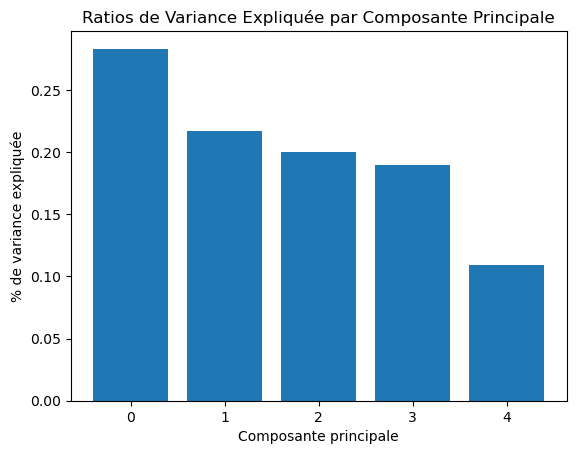

In [35]:
# Calcul des ratios de la variance expliquée par chaque composante principale
ratios=pca.explained_variance_ratio_
# Création d'un diagramme en barres pour visualiser les ratios
plt.bar(range(len(ratios)), ratios)
# Définition des positions des étiquettes sur l'axe x
plt.xticks(range(len(ratios)))
# Ajout d'une étiquette pour l'axe des x
plt.xlabel("Composante principale")
# Ajout d'une étiquette pour l'axe des y
plt.ylabel("% de variance expliquée")
# Affichage du diagramme en barres
plt.title("Ratios de Variance Expliquée par Composante Principale")
plt.show()

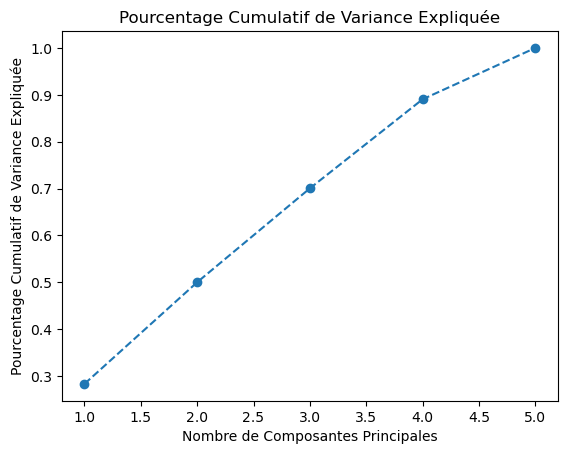

In [49]:

# Calculer le pourcentage cumulatif de variance expliquée
cumulative_variance_ratio = np.cumsum(ratios)

# Afficher le graphique du pourcentage cumulatif de variance expliquée
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Pourcentage Cumulatif de Variance Expliquée')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Pourcentage Cumulatif de Variance Expliquée')
plt.show()

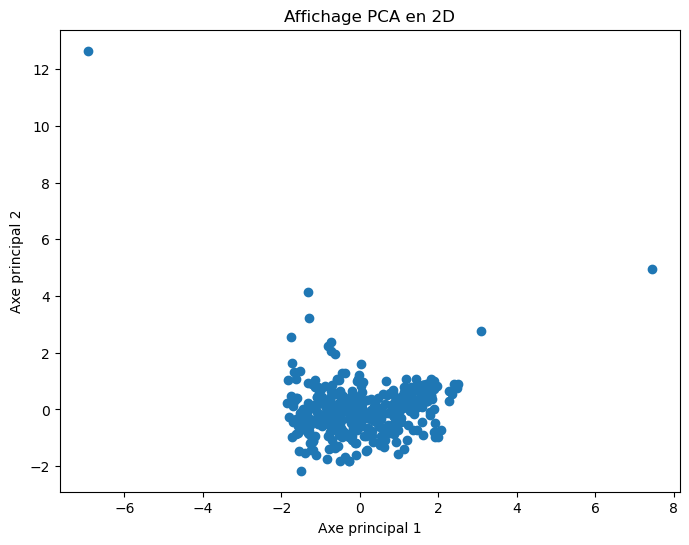

In [37]:
#calcule de coordonnées, avec la fonction transform() de l'objet pca.
dft = pca.transform(scaled)
plt.figure(figsize=(8, 6))
plt.scatter(dft[:,0], dft[:, 1])
plt.title('Affichage PCA en 2D')
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 2')
plt.show()

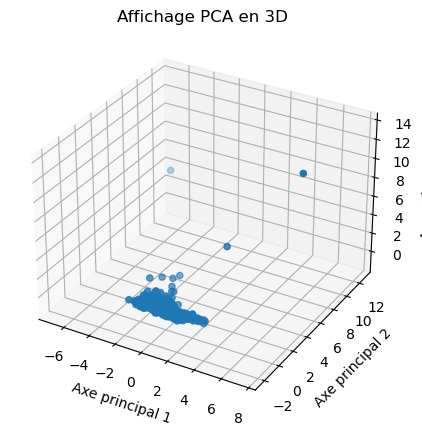

In [45]:
# Appliquer la transformation PCA
dft = pca.transform(scaled)

# Créer une figure tridimensionnelle
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

# Afficher le nuage de points en 3D
ax.scatter(dft[:, 0], dft[:, 1], dft[:, 2])

# Ajouter des titres et des étiquettes
ax.set_title('Affichage PCA en 3D')
ax.set_xlabel('Axe principal 1')
ax.set_ylabel('Axe principal 2')
ax.set_zlabel('Axe principal 3')

# Afficher le graphique
plt.show()

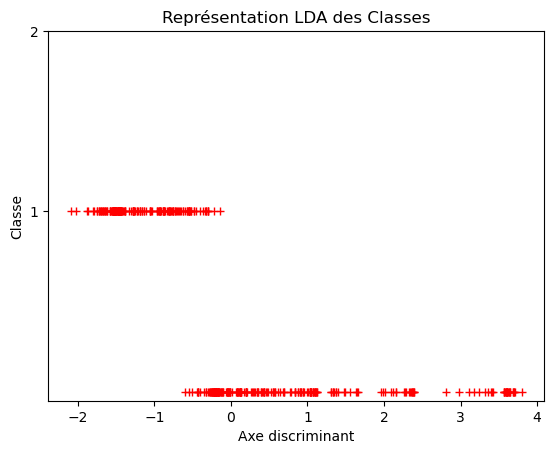

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Création d'une instance du modèle LDA (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
y= df2['Rating'].apply(lambda x: 1 if x > 4.0 else 0)
# Entraînement du modèle avec les données d'entraînement
lda.fit(scaled,y)
dt= lda.transform(scaled)
plt.plot(dt, y, 'r+')  # Tracé des points en utilisant les résultats de la transformation LDA
plt.xlabel("Axe discriminant")     # Ajout d'une étiquette à l'axe des x
plt.ylabel("Classe")    # Ajout d'une étiquette à l'axe des y
plt.yticks([1, 2])                   # Définition des positions des graduations sur l'axe des y
# Ajout du titre au graphique
plt.title('Représentation LDA des Classes')
plt.show()            

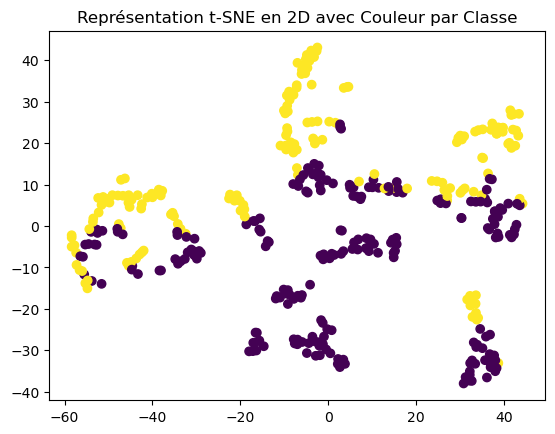

In [44]:
from sklearn.manifold import TSNE
# Création d'une instance de l'algorithme t-SNE
tsne = TSNE(n_components=2, perplexity=10)

# Transformation des données en utilisant t-SNE
embedding = tsne.fit_transform(scaled)

# Tracé d'un nuage de points en utilisant les résultats de la transformation t-SNE
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis')

# Ajout d'un titre
plt.title('Représentation t-SNE en 2D avec Couleur par Classe')

# Affichage du graphique
plt.show()

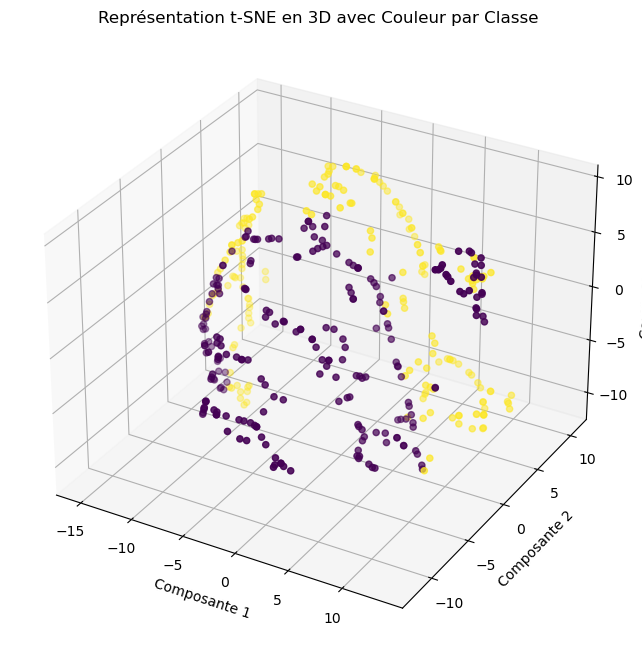

In [106]:
# Création d'une instance de l'algorithme t-SNE
tsne = TSNE(n_components=3, perplexity=10)
# Transformation des données en utilisant t-SNE
embedding = tsne.fit_transform(scaled)
# Création d'une figure en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Tracé d'un nuage de points en utilisant les résultats de la transformation t-SNE en 3D
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=y, cmap='viridis')
# Ajout d'un titre
ax.set_title('Représentation t-SNE en 3D avec Couleur par Classe')
# Ajout d'étiquettes d'axes
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')
# Affichage du graphique
plt.show()

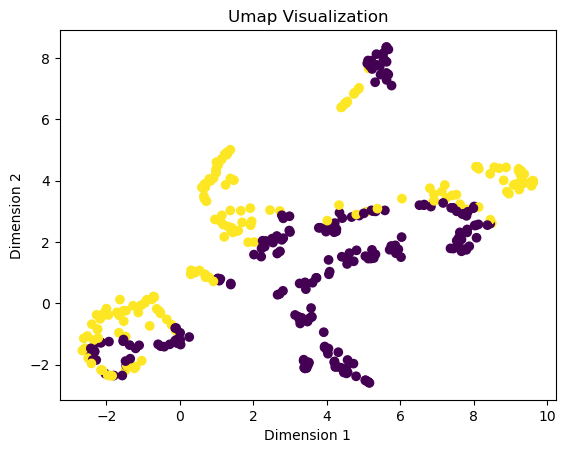

In [41]:
from umap import UMAP
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(scaled)
df_umap = pd.DataFrame(data=umap_result, columns=['Dimension 1', 'Dimension 2'])
y= df2['Rating'].apply(lambda x: 1 if x > 4.0 else 0)

# Tracer le nuage de points
plt.scatter(df_umap['Dimension 1'], df_umap['Dimension 2'], c=y)
plt.title('Umap Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()


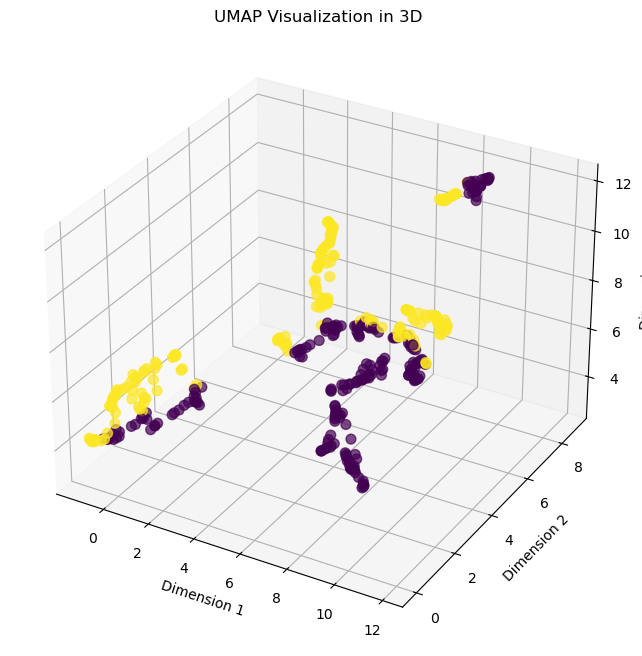

In [74]:
from umap import UMAP
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que scaled soit votre ensemble de données
umap_model = UMAP(n_components=3)
umap_result = umap_model.fit_transform(scaled)
df_umap = pd.DataFrame(data=umap_result, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
y = df2['Rating'].apply(lambda x: 1 if x > 4.0 else 0)

# Tracer le nuage de points en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser scatter pour créer un nuage de points 3D
ax.scatter(df_umap['Dimension 1'], df_umap['Dimension 2'], df_umap['Dimension 3'], c=y, cmap='viridis', s=50, alpha=0.7)

# Ajouter des étiquettes et un titre
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('UMAP Visualization in 3D')

# Afficher le graphe
plt.show()